In [18]:
library(reshape2)
library(ggplot2)
# Testing more than two sample
# A company want to evaluate three different method for training its employees to do a particular job
Method_1 <- c(95, 91, 89, 90, 99, 88, 96, 98, 95, NA)
Method_2 <- c(83, 89, 85, 89, 81, 89, 90, 82, 84, 80)
Method_3 <- c(68, 75, 79, 74, 75, 81, 73, 77, NA, NA)

In [2]:
Three_Training_Methods <- data.frame(Method_1, Method_2, Method_3)

In [20]:
Three_Training_Methods

Method_1,Method_2,Method_3
95,83,68
91,89,75
89,85,79
90,89,74
99,81,75
88,89,81
96,90,73
98,82,77
95,84,NA
NA,80,NA


In [4]:
# find the mean of each method
round(colMeans(Three_Training_Methods, na.rm=TRUE), 2)

Method_1 Method_2 Method_3 
   93.44    85.20    75.25

In [5]:
# find the varience of each method
round(sapply(Three_Training_Methods, var, na.rm=TRUE), 2)

Method_1 Method_2 Method_3 
   16.28    14.18    15.64

In [6]:
# find dthe standard deviation of each method
round(sapply(Three_Training_Methods, sd, na.rm=TRUE), 2)

Method_1 Method_2 Method_3 
    4.03     3.77     3.96

In [7]:
# hypothesis
# h0: the mean of the three methods are the same u1 = u2 = u3
# h1: Not h0
# h0 can transform into SSB<=SSW
# h1 can transform into SSB=>SSW

In [10]:
head(Three_Training_Methods.melt <- melt(Three_Training_Methods, value.name = "Score"))

No id variables; using all as measure variables


variable,Score
Method_1,95
Method_1,91
Method_1,89
Method_1,90
Method_1,99
Method_1,88


In [11]:
colnames(Three_Training_Methods.melt) <- c("Method", "Score")

In [12]:
head(Three_Training_Methods.melt)

Method,Score
Method_1,95
Method_1,91
Method_1,89
Method_1,90
Method_1,99
Method_1,88


In [13]:
analysis <- aov(Score ~ Method, data = Three_Training_Methods.melt)

In [14]:
summary(analysis)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Method       2 1402.7   701.3   45.82 6.38e-09 ***
Residuals   24  367.3    15.3                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
3 observations deleted due to missingness

In [15]:
# the f-value in this case is 45.82, which is much bigger than 4.32, so we can reject the null hypothesis
round(qf(0.025, df1=2, df2=24, lower.tail=FALSE), 2)

[1] 4.32

Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”

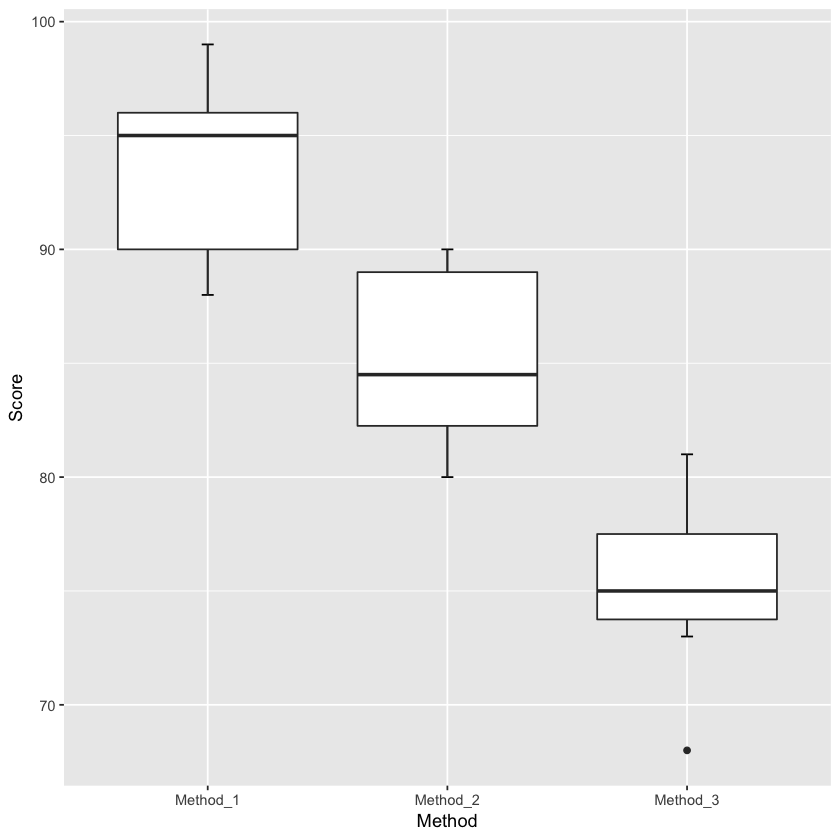

In [19]:
# Visualizing the results
ggplot(Three_Training_Methods.melt, aes(x=Method, y=Score)) + stat_boxplot(geom="errorbar", width=0.05) + geom_boxplot()

In [21]:
# based on the above information, we can see that the mean of all three methods are difference, but we still don't know how they are different to each other. in order to get more insight, we will do contract between the each method
# first set of contrast: Method_2 mean > Method_3 mean and Method_1 mean > average of Method_2 and Method_3
# Second set of contrast: Method_1 mean > Method_2 mean and Method_3 mean > average of Method_1 and Method_2
# Third set of contrast: Method_3 mean > Method_1 mean and Method_2 mean > average of Method_1 and Method_3

In [22]:
# the comparison coefficients for the first set is (0, +1, -1) and (+2, -1, -1)
# the comparison coefficients for the second set is (+1, -1, 0) and (-1, -1, +2)
# the comparison coefficients for the third set is (1, 0, -1) and (-1, +2, -1)

In [25]:
# For the first set
contrasts(Three_Training_Methods.melt$Method) <- matrix(c(0,1,-1,2,-1,-1), 3, 3)

In [27]:
set1 <- contrasts(Three_Training_Methods.melt$Method)

In [28]:
set1

Method_1,0,2
Method_2,1,-1
Method_3,-1,-1


In [29]:
set1_contrast <- aov(Score ~ Method, data=Three_Training_Methods.melt, contrasts = set1)

In [32]:
summary(set1_contrast, split=list(Method=list("2 vs 3"= 1, "1 vs 2 & 3"=2)))

                     Df Sum Sq Mean Sq F value   Pr(>F)    
Method                2 1402.7   701.3   45.82 6.38e-09 ***
  Method: 2 vs 3      1  358.5   358.5   23.42 6.24e-05 ***
  Method: 1 vs 2 & 3  1 1044.2  1044.2   68.22 1.78e-08 ***
Residuals            24  367.3    15.3                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
3 observations deleted due to missingness

In [33]:
# for set 1, we can see that method 2 mean is bigger than method 3 and the mean of method 1 is bigger than the average of method 2 and method 3

In [35]:
# for set 2
contrasts(Three_Training_Methods.melt$Method) <- matrix(c(1, -1, 0, -1, -1, 2), 3, 2)

In [36]:
set2 <- contrasts(Three_Training_Methods.melt$Method)

In [37]:
set2

Method_1,1,-1
Method_2,-1,-1
Method_3,0,2


In [38]:
set2_contrast <- aov(Score ~ Method, data=Three_Training_Methods.melt, contrasts = set2)

In [40]:
summary(set2_contrast, split=list(Method=list("1 vs 2"=1, "3 vs 1 & 2"=2))) 

                     Df Sum Sq Mean Sq F value   Pr(>F)    
Method                2 1402.7   701.3   45.82 6.38e-09 ***
  Method: 1 vs 2      1  288.8   288.8   18.87  0.00022 ***
  Method: 3 vs 1 & 2  1 1113.9  1113.9   72.78 9.93e-09 ***
Residuals            24  367.3    15.3                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
3 observations deleted due to missingness

In [ ]:
# based on the contrast, we can see that the mean of method 1 is bigger than method 2 and the mean of method 3 is bigger than the average of method 1 and 2

In [54]:
# for set 3
contrasts(Three_Training_Methods.melt$Method) <- matrix(c(1,0,-1,-1,2,-1),3,2)

In [55]:
set3 <- contrasts(Three_Training_Methods.melt$Method)

In [56]:
set3

Method_1,1,-1
Method_2,0,2
Method_3,-1,-1


In [57]:
set3_contrast <- aov(Score ~ Method, data=Three_Training_Methods.melt, contrasts = set3)

In [58]:
summary(set3_contrast, split=list(Method=list("1 vs 3"=1, "2 vs 1 & 3"=2)))

                     Df Sum Sq Mean Sq F value   Pr(>F)    
Method                2 1402.7   701.3  45.824 6.38e-09 ***
  Method: 1 vs 3      1 1398.1  1398.1  91.349 1.18e-09 ***
  Method: 2 vs 1 & 3  1    4.6     4.6   0.299     0.59    
Residuals            24  367.3    15.3                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
3 observations deleted due to missingness

In [59]:
# based on the result, we can see that the mean of method 1 is bigger than method 3, but the mean of method 2 is not bigger than the average of method 1 and 3

In [61]:
# do a tukey test to confirm the above result
TukeyHSD(analysis)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Score ~ Method, data = Three_Training_Methods.melt)

$Method
                        diff       lwr        upr     p adj
Method_2-Method_1  -8.244444 -12.73337  -3.755523 0.0003383
Method_3-Method_1 -18.194444 -22.94172 -13.447166 0.0000000
Method_3-Method_2  -9.950000 -14.58423  -5.315769 0.0000481


In [ ]:
# based on the result we can see that the mean of each method is significantly different from each other